## Univariate Analysis Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['axes.grid'] = True

def split_types(df):
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = [c for c in df.columns if c not in num_cols]
    return num_cols, cat_cols

def var_type_table(df):
    num_cols, cat_cols = split_types(df)
    rows = []
    for c in num_cols:
        rows.append((c, 'Numeric', f"{df[c].isna().mean()*100:.2f}%"))
    for c in cat_cols:
        rows.append((c, 'Categorical', f"{df[c].isna().mean()*100:.2f}%"))
    return pd.DataFrame(rows, columns=['Variable','Type','Missing %']).sort_values(['Type','Variable']).reset_index(drop=True)

def plot_univariate(df, dataset_name="", max_num_plots=3):
    num_cols, cat_cols = split_types(df)

    # Histograms for up to 3 numeric columns
    for col in num_cols[:max_num_plots]:
        df[col].dropna().plot(kind='hist', bins=40, alpha=.85)
        plt.title(f"{dataset_name}: Distribution of {col}")
        plt.xlabel(col); plt.ylabel("Count")
        plt.show()

    # Boxplots for first 2 numeric columns (if any)
    for col in num_cols[:2]:
        df[[col]].plot(kind='box')
        plt.title(f"{dataset_name}: Boxplot of {col}")
        plt.show()

    # Bar charts for first 2 categorical columns (if any)
    for col in cat_cols[:2]:
        (df[col].astype('string')
            .value_counts(dropna=False)
            .head(10)
            .plot(kind='bar'))
        plt.title(f"{dataset_name}: Top categories for {col}")
        plt.xlabel(col); plt.ylabel("Count")
        plt.show()

**File Pathing**

In [3]:
paths = {
    "SPY_trades" : "SPY_trades_clean_2024-03-11_2024-03-15.csv",
    "SPY_1s"     : "SPY_1s_clean_2024-03-11_2024-03-15.csv",
    "SPY_1m"     : "SPY_1m_clean_2024-03-11_2024-03-15.csv",
    "OPT_trades" : "OPT_trades_clean_2024-03-11_2024-03-15.csv",
    "OPT_1s"     : "OPT_1s_clean_2024-03-11_2024-03-15.csv",
    "OPT_1m"     : "OPT_1m_clean_2024-03-11_2024-03-15.csv",
}

dfs_uni = {name: pd.read_csv(p) for name,p in paths.items()}


## Univariate Analysis


=== SPY_trades: Variable Types & Missing ===


,Variable,Type,Missing %
0,conditions,Categorical,20.75%
1,datetime_et,Categorical,0.00%
2,dt_diff_s,Numeric,0.02%
3,exchange,Numeric,0.00%
4,price,Numeric,0.00%
5,size,Numeric,0.00%



=== SPY_trades: Basic Univariate Plots ===


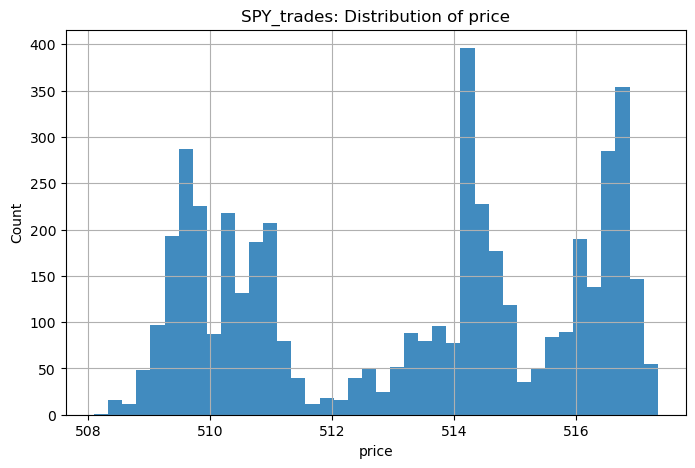

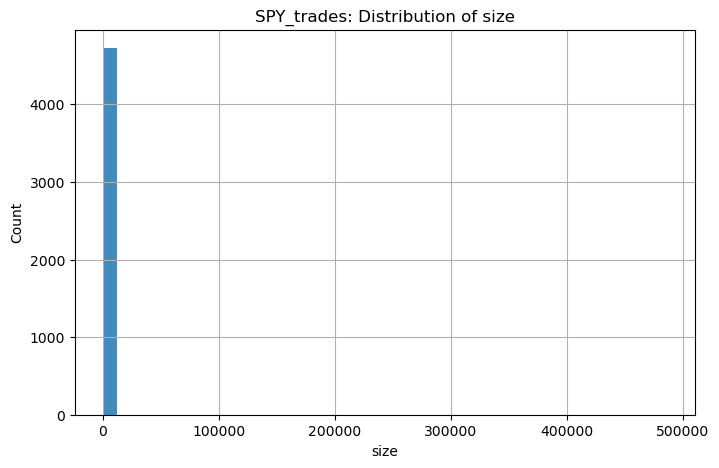

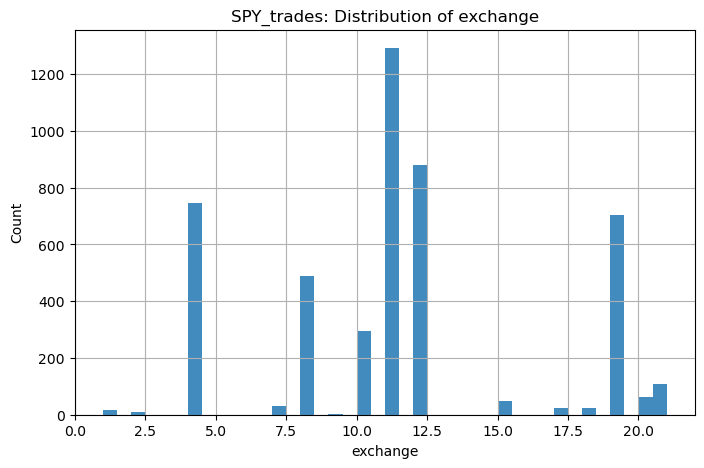

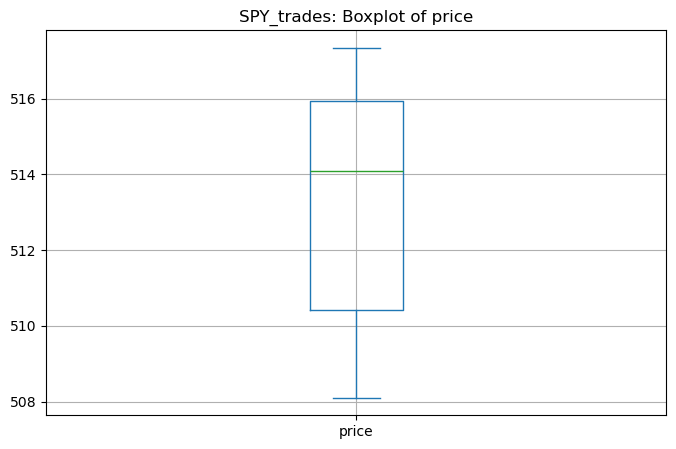

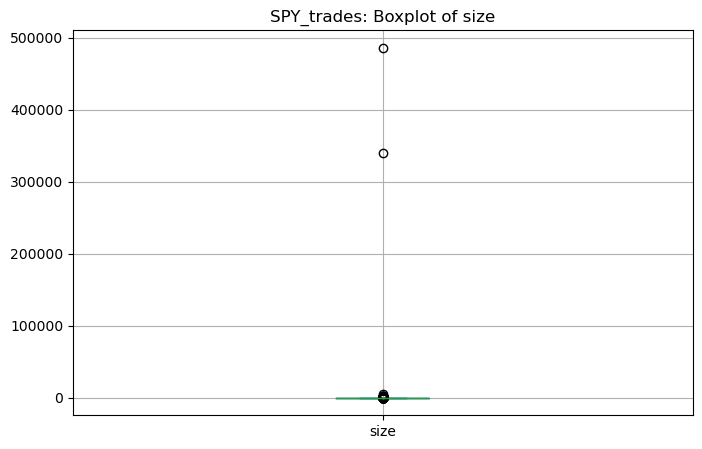

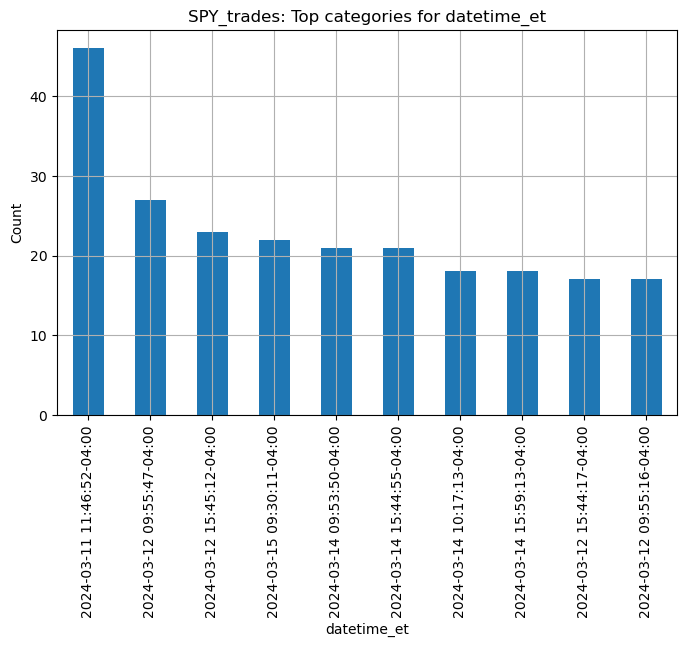

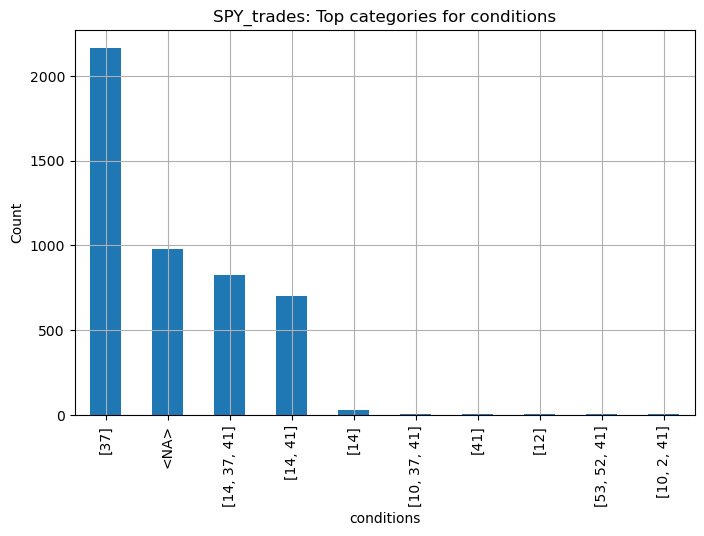


=== SPY_1s: Variable Types & Missing ===


,Variable,Type,Missing %
0,datetime_et,Categorical,0.00%
1,close,Numeric,0.00%
2,high,Numeric,0.00%
3,low,Numeric,0.00%
4,open,Numeric,0.00%
5,ret_log,Numeric,0.00%
6,transactions,Numeric,0.00%
7,volume,Numeric,0.00%
8,vwap,Numeric,0.00%



=== SPY_1s: Basic Univariate Plots ===


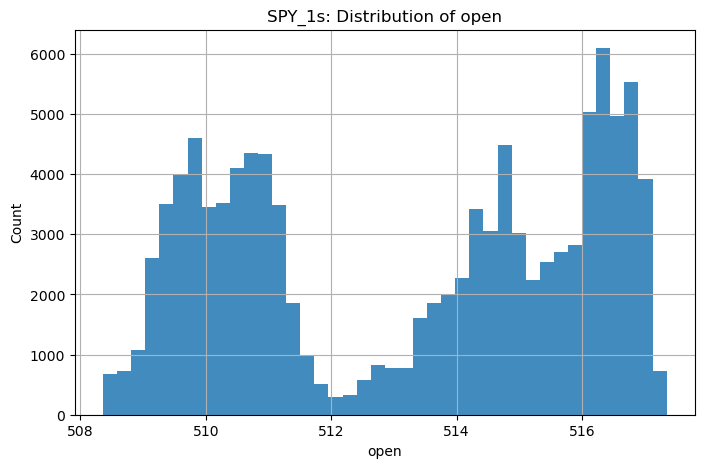

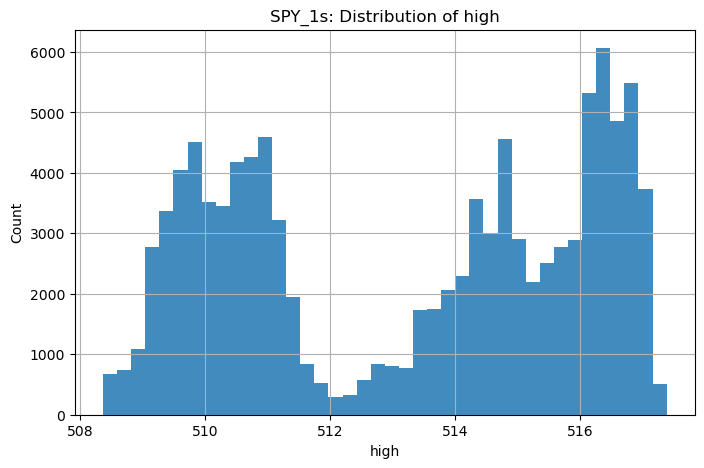

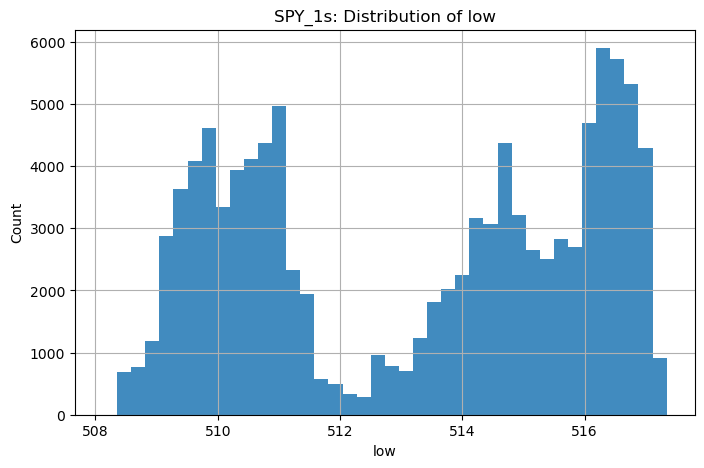

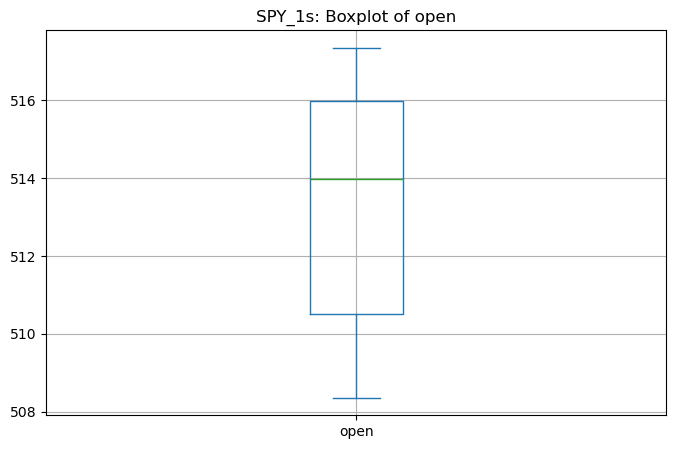

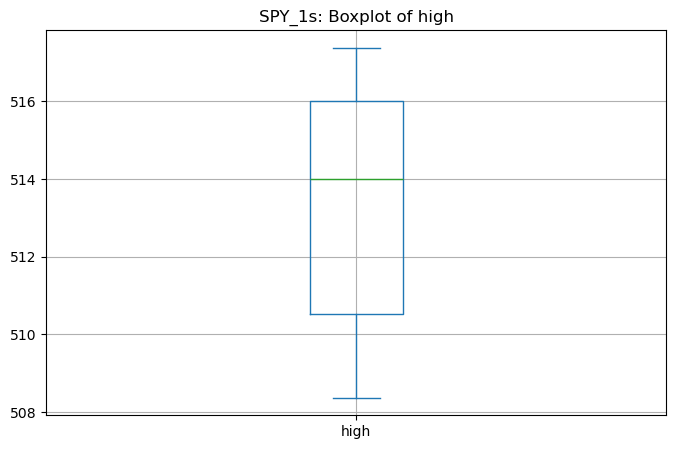

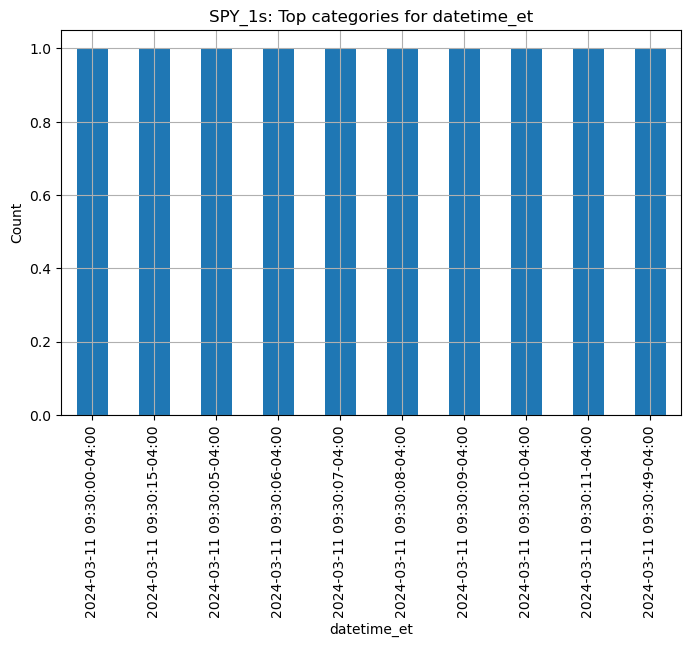


=== SPY_1m: Variable Types & Missing ===


,Variable,Type,Missing %
0,datetime_et,Categorical,0.00%
1,close,Numeric,0.00%
2,high,Numeric,0.00%
3,low,Numeric,0.00%
4,open,Numeric,0.00%
5,ret_log,Numeric,0.05%
6,rv_5m,Numeric,0.26%
7,transactions,Numeric,0.00%
8,volume,Numeric,0.00%
9,vwap,Numeric,0.00%



=== SPY_1m: Basic Univariate Plots ===


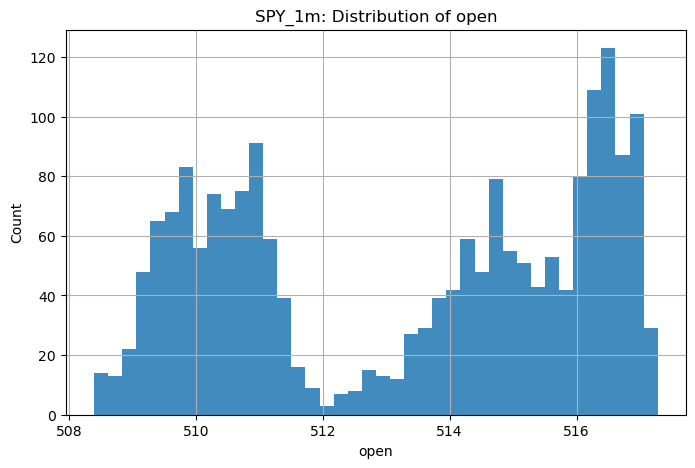

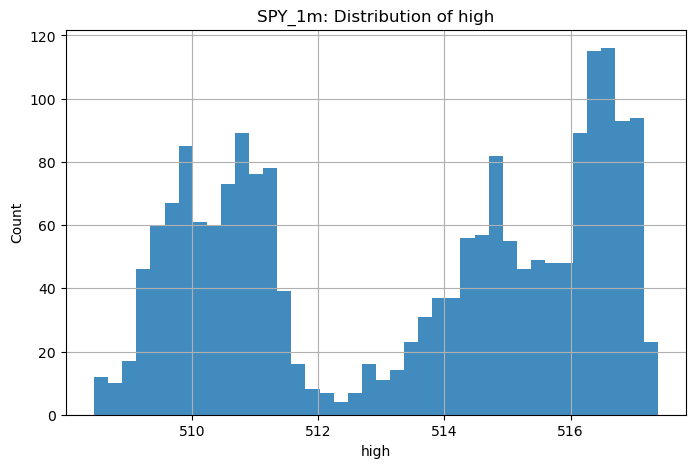

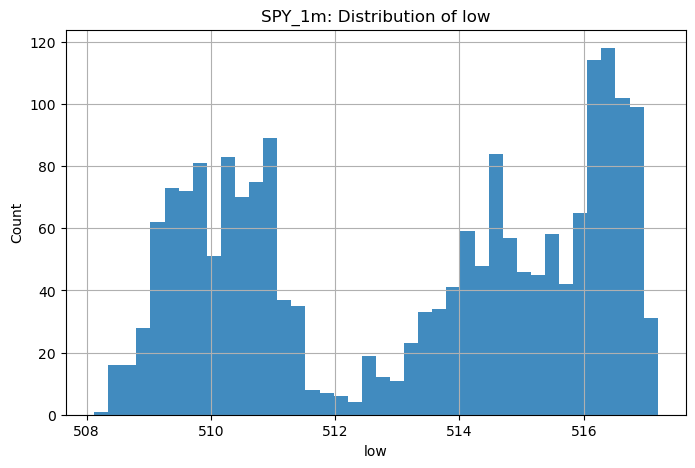

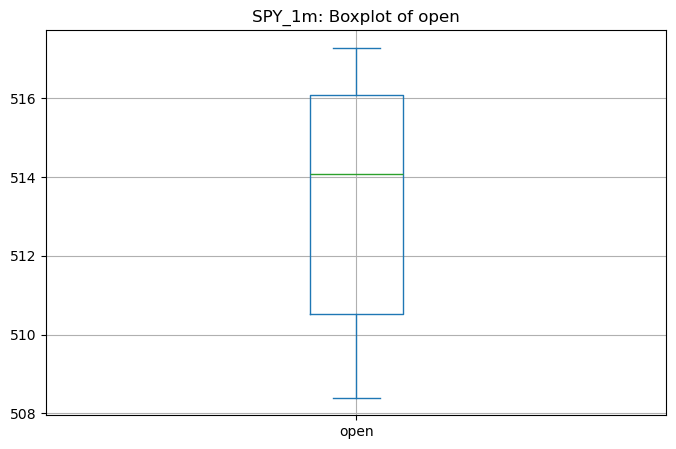

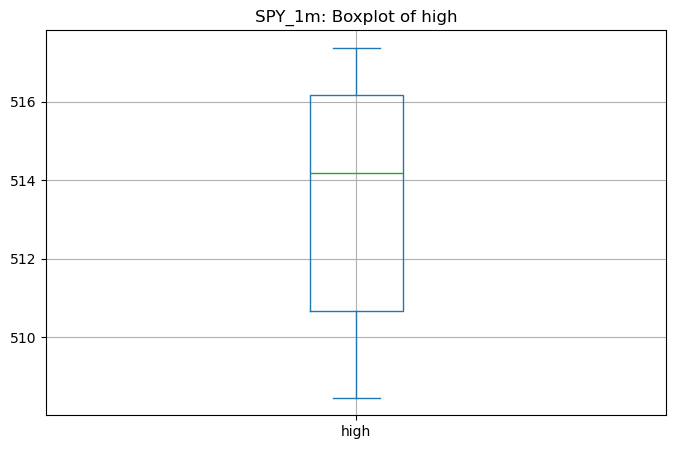

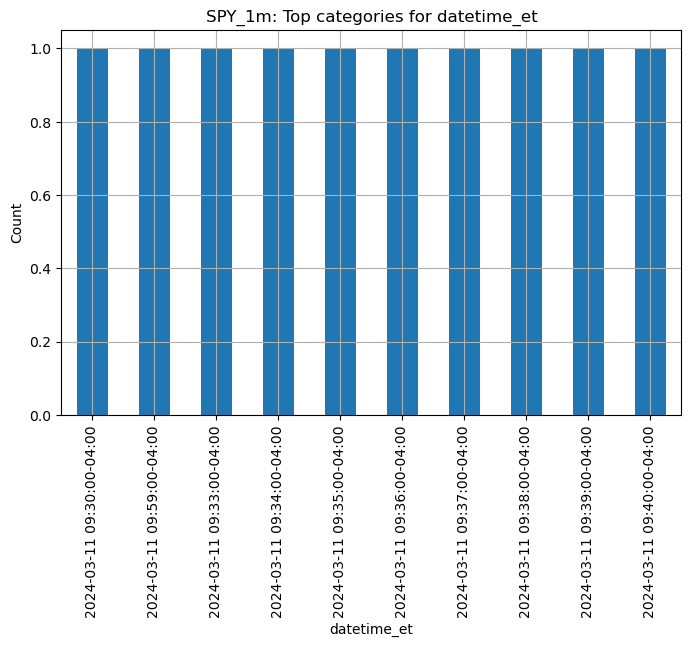


=== OPT_trades: Variable Types & Missing ===


,Variable,Type,Missing %
0,conditions,Categorical,0.00%
1,datetime_et,Categorical,0.00%
2,dt_diff_s,Numeric,0.52%
3,exchange,Numeric,0.00%
4,price,Numeric,0.00%
5,size,Numeric,0.00%



=== OPT_trades: Basic Univariate Plots ===


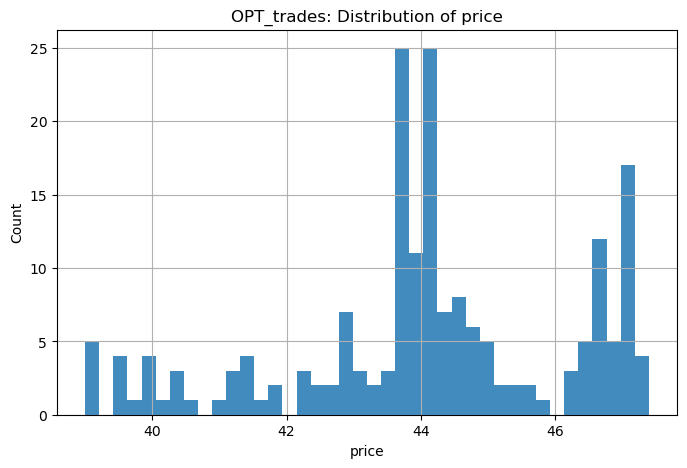

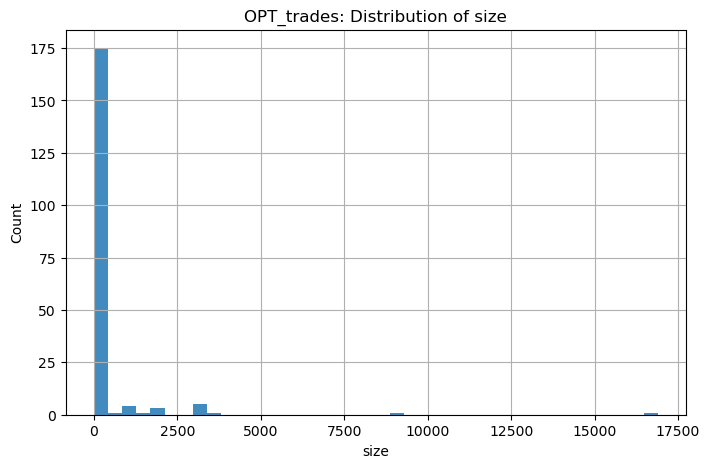

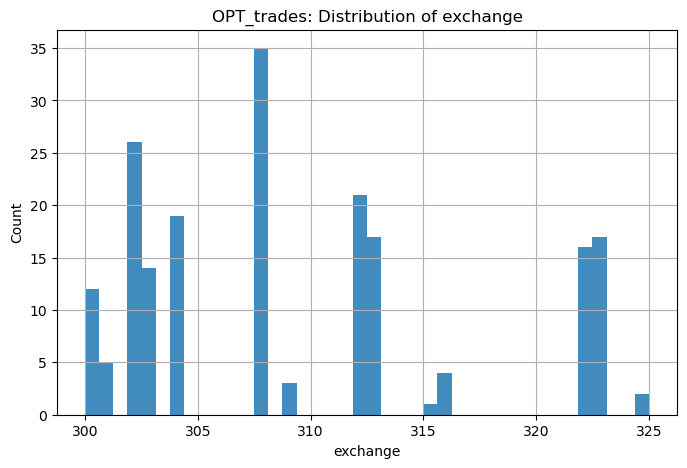

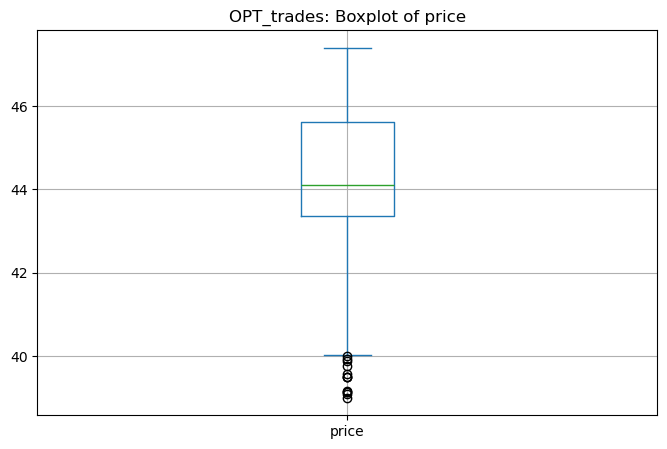

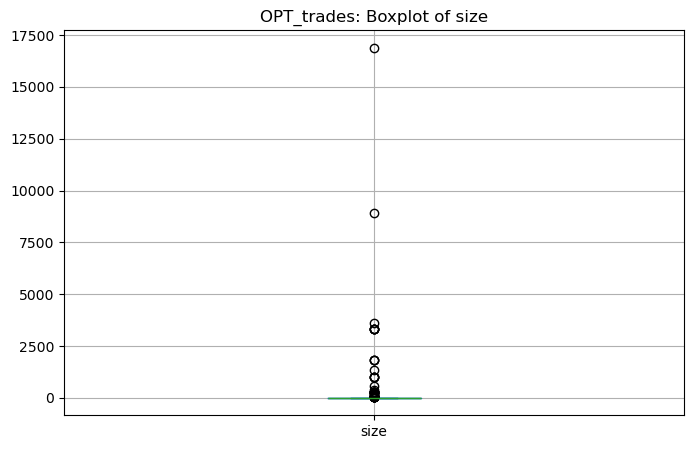

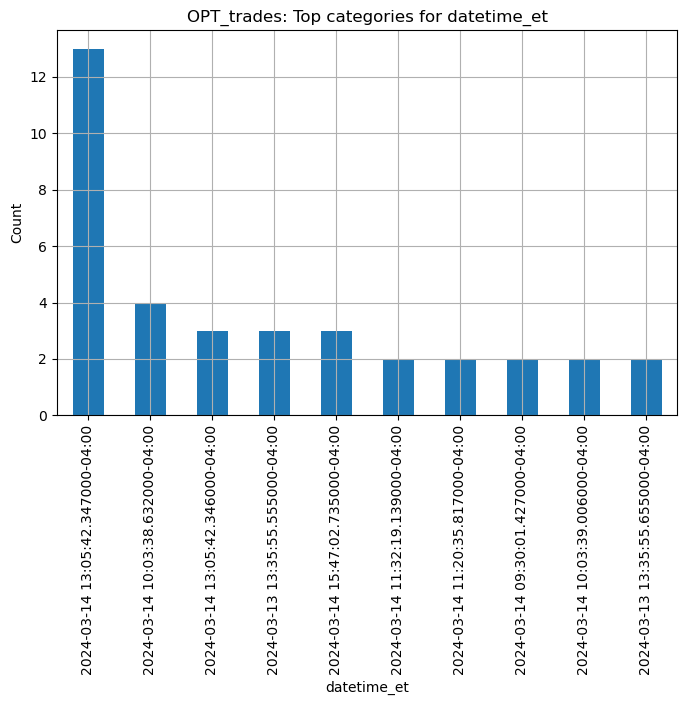

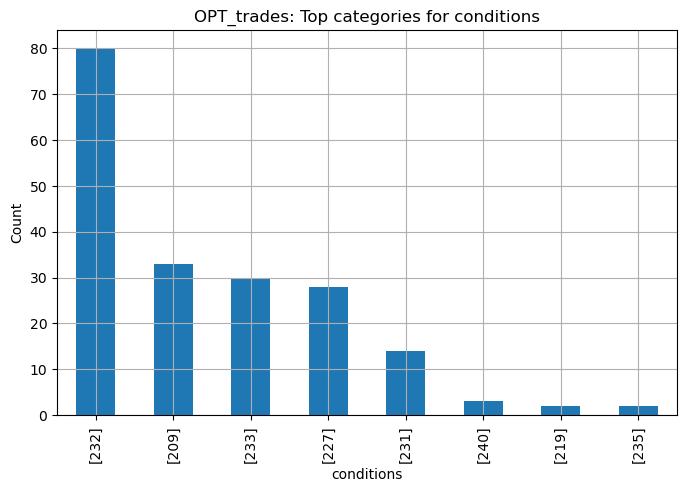


=== OPT_1s: Variable Types & Missing ===


,Variable,Type,Missing %
0,datetime_et,Categorical,0.00%
1,close,Numeric,0.00%
2,high,Numeric,0.00%
3,low,Numeric,0.00%
4,open,Numeric,0.00%
5,ret_log,Numeric,0.78%
6,transactions,Numeric,0.00%
7,volume,Numeric,0.00%
8,vwap,Numeric,0.00%



=== OPT_1s: Basic Univariate Plots ===


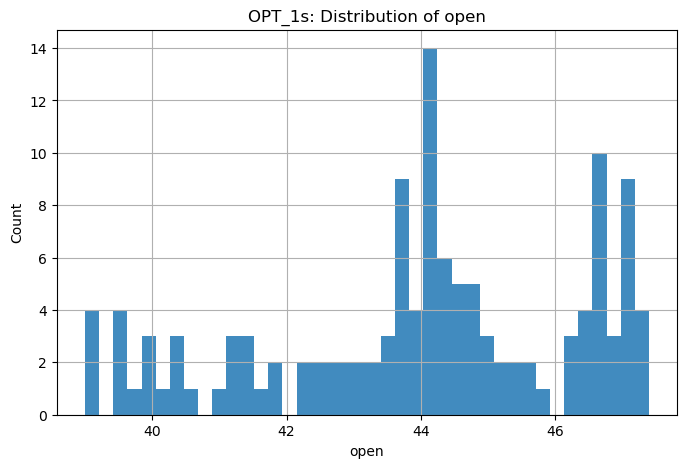

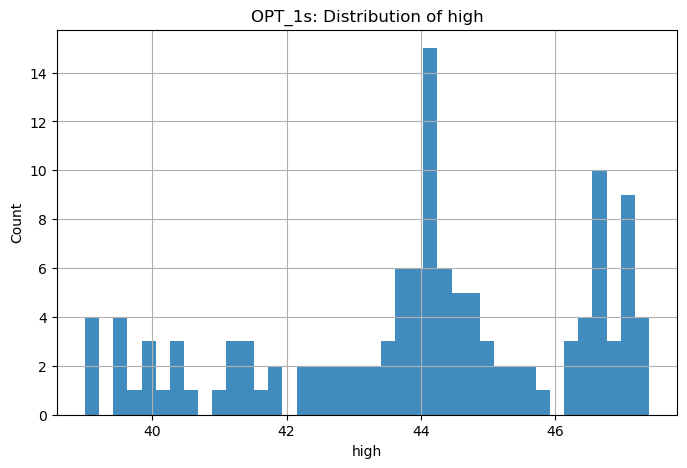

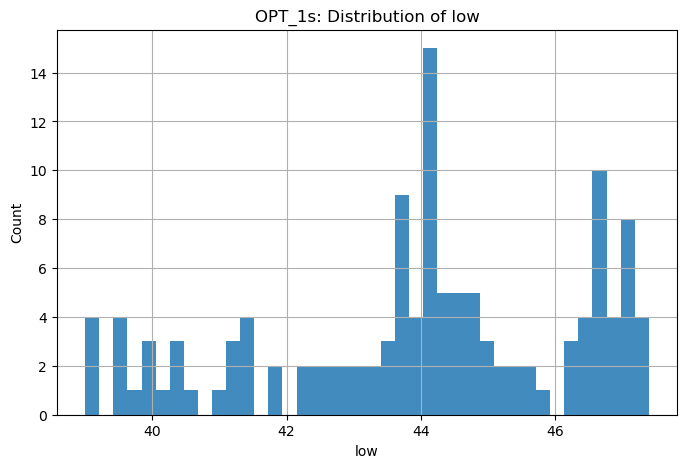

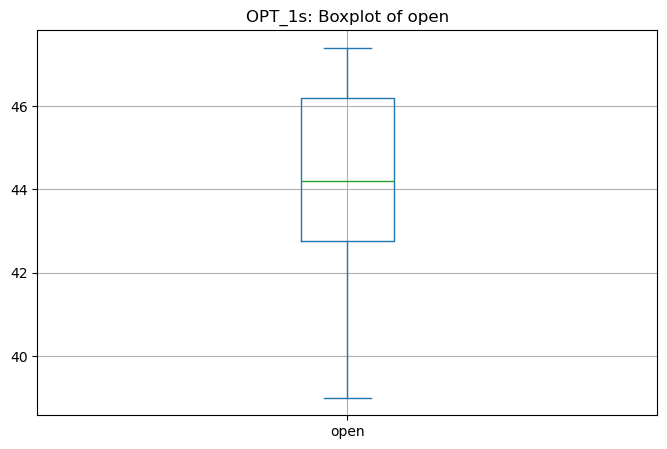

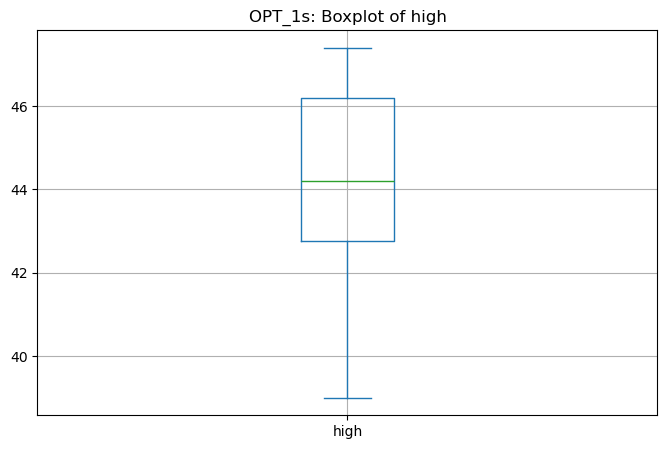

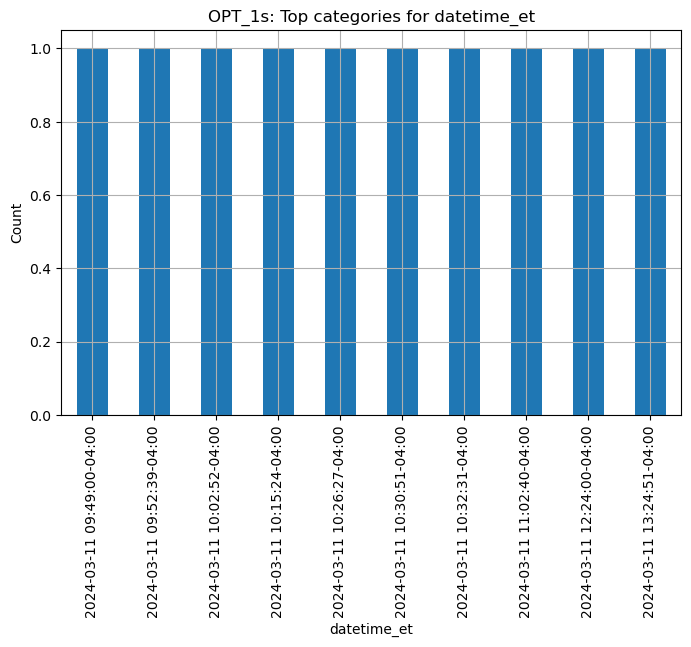


=== OPT_1m: Variable Types & Missing ===


,Variable,Type,Missing %
0,datetime_et,Categorical,0.00%
1,close,Numeric,0.00%
2,high,Numeric,0.00%
3,low,Numeric,0.00%
4,open,Numeric,0.00%
5,ret_log,Numeric,0.86%
6,rv_5m,Numeric,4.31%
7,transactions,Numeric,0.00%
8,volume,Numeric,0.00%
9,vwap,Numeric,0.00%



=== OPT_1m: Basic Univariate Plots ===


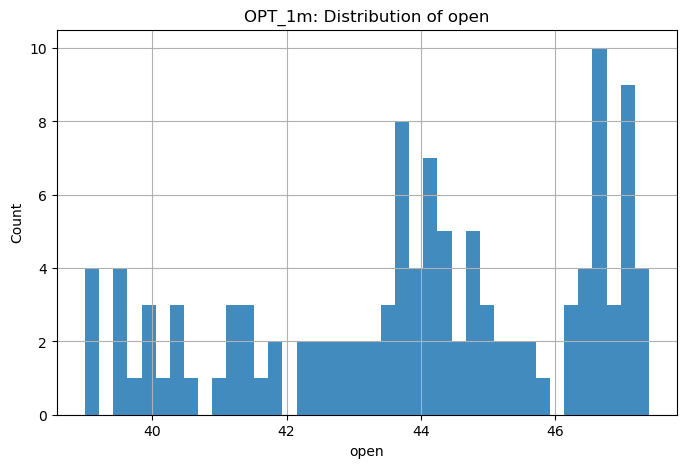

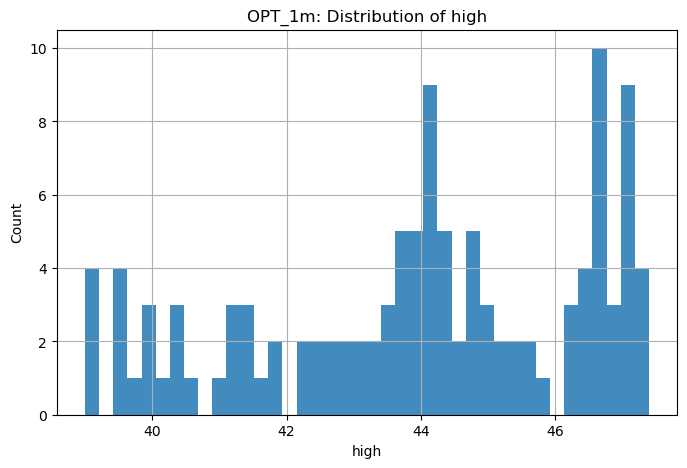

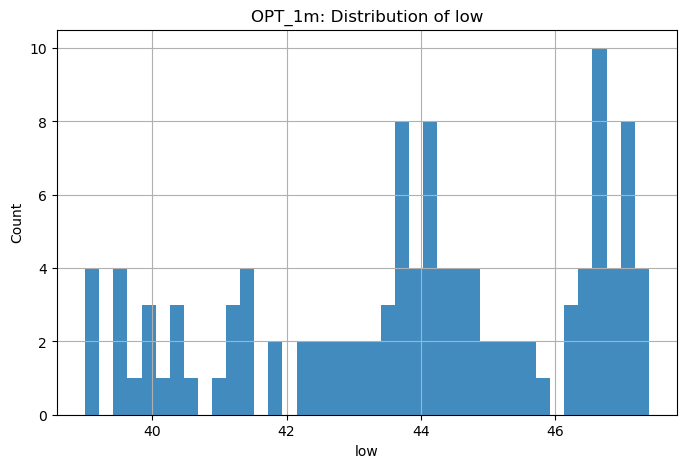

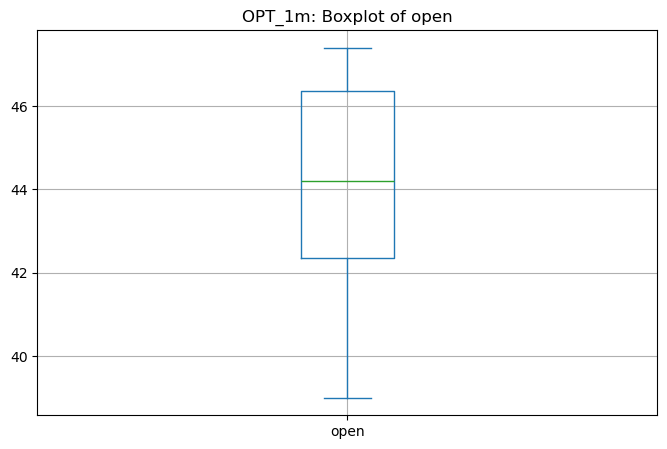

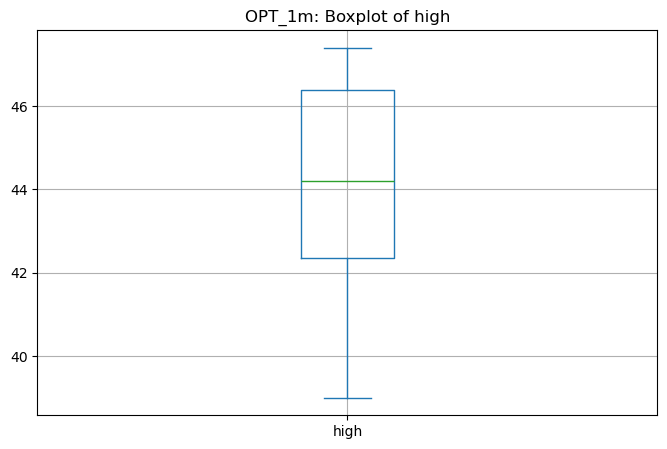

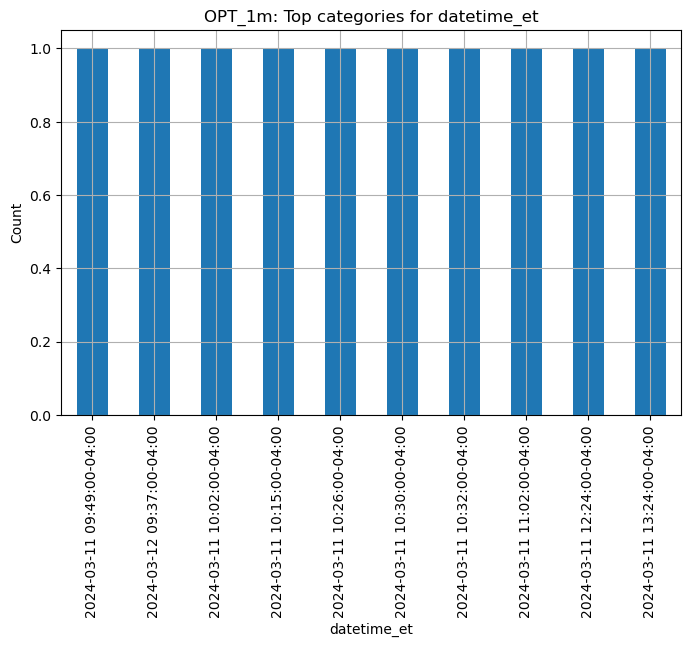

In [4]:
def run_univariate(df, dataset_name):
    print(f"\n=== {dataset_name}: Variable Types & Missing ===")
    display(var_type_table(df))

    print(f"\n=== {dataset_name}: Basic Univariate Plots ===")
    plot_univariate(df, dataset_name=dataset_name)

for name, df in dfs_uni.items():
    run_univariate(df, name)